# 💳 Loan Approval Classification

This project aims to classify whether a loan applicant is eligible for loan approval using machine learning algorithms.  
The model is designed to predict loan approval status based on the applicant's financial profile and credit history.



## 📊Dataset

## 1. Data Source
This dataset is a **synthetic version** inspired by the original *Credit Risk* dataset on Kaggle and enriched with additional variables based on **Financial Risk for Loan Approval** data.  
SMOTENC was used to simulate new data points to enlarge the instances.  
The dataset is structured for both **categorical and continuous features**.

---

## 2. Metadata

The dataset contains **45,000 records** and **14 variables**, each described below:

| Column                          | Description                                                  | Type         |
|----------------------------------|--------------------------------------------------------------|--------------|
| `person_age`                     | Age of the person                                            | Float        |
| `person_gender`                 | Gender of the person                                         | Categorical  |
| `person_education`             | Highest education level                                      | Categorical  |
| `person_income`                | Annual income                                                | Float        |
| `person_emp_exp`              | Years of employment experience                               | Integer      |
| `person_home_ownership`       | Home ownership status (e.g., rent, own, mortgage)            | Categorical  |
| `loan_amnt`                    | Loan amount requested                                        | Float        |
| `loan_intent`                  | Purpose of the loan                                          | Categorical  |
| `loan_int_rate`                | Loan interest rate                                           | Float        |
| `loan_percent_income`         | Loan amount as a percentage of annual income                 | Float        |
| `cb_person_cred_hist_length`  | Length of credit history in years                            | Float        |
| `credit_score`                 | Credit score of the person                                   | Integer      |
| `previous_loan_defaults_on_file` | Indicator of previous loan defaults                        | Categorical  |
| `loan_status` *(target variable)* | Loan approval status: **1 = approved; 0 = rejected**     | Integer      |


## Data Gathering and import library

In [35]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
RANDOM_STATE = 42

In [36]:
!gdown --id 14zJMAHRFEhw5vMJnHhxe3iT5hTiImP2q

df = pd.read_csv('loan_data.csv')
df.head()

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14zJMAHRFEhw5vMJnHhxe3iT5hTiImP2q
To: /content/loan_data.csv
100% 3.61M/3.61M [00:00<00:00, 92.0MB/s]


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [38]:
df['person_age'] = df['person_age'].astype('int')
df['person_age'].dtypes

dtype('int64')

In [39]:
#check missing value
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [40]:
import pandas as pd

# misal df adalah DataFrame-mu
for col in df.columns:
    uniques = df[col].unique()
    print(f"{col!r} has {len(uniques)} unique values:")
    print(uniques)
    print("-" * 40)


'person_age' has 60 unique values:
[ 22  21  25  23  24  26 144 123  20  32  34  29  33  28  35  31  27  30
  36  40  50  45  37  39  44  43  41  46  38  47  42  48  49  58  65  51
  53  66  61  54  57  59  62  60  55  52  64  70  78  69  56  73  63  94
  80  84  76  67 116 109]
----------------------------------------
'person_gender' has 2 unique values:
['female' 'male']
----------------------------------------
'person_education' has 5 unique values:
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
----------------------------------------
'person_income' has 33989 unique values:
[71948. 12282. 12438. ... 31924. 56942. 33164.]
----------------------------------------
'person_emp_exp' has 63 unique values:
[  0   3   1   5   4   2   7   6 125   8 121 101 100  12  10   9  14  13
  11  15  16  17  19  28  25  18  24  22  20  23  21  31  26  27  29  32
  30 124  40  43  33  44  34  42  37  45  36  41  47  38  39  35  57  46
  49  48  50  76  62  61  58  93  85]
----------------

In [41]:
#check duplicate
df.duplicated().sum()

0

In [42]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [43]:
cat_cols = [var for var in df.columns if df[var].dtypes == 'object']

print(f'Categorical columns: {cat_cols}')

Categorical columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


## Data Cleaning

### Spliting Data

In [44]:
features = [x for x in df.columns if x != 'loan_status']
X = df[features]
y = df['loan_status']

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [46]:
print(f'train sample: {len(X_train)}')
print(f'validation sample: {len(X_val)}')
print(f'Proportion target: {sum(y_train)/len(y_train)}')

train sample: 36000
validation sample: 9000
Proportion target: 0.22194444444444444


### Outlier

In [47]:
num_cols = [var for var in X_train.columns if df[var].dtypes != 'object']
print(f'Numerical columns: {num_cols}')

Numerical columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


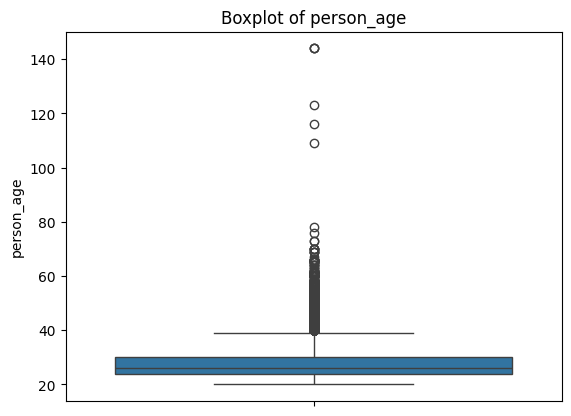

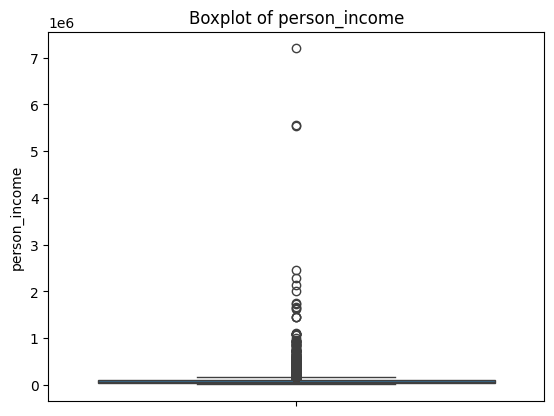

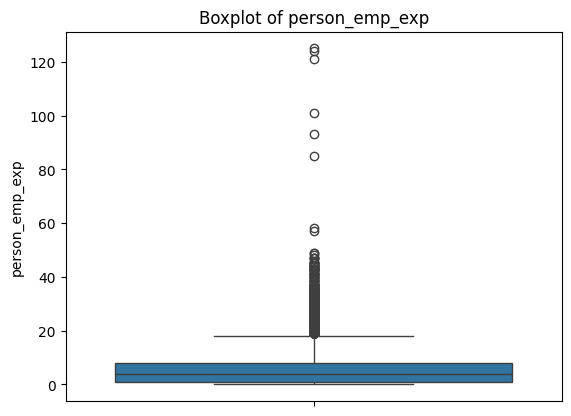

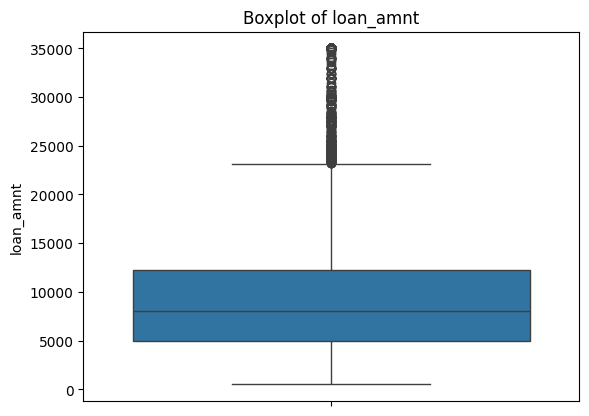

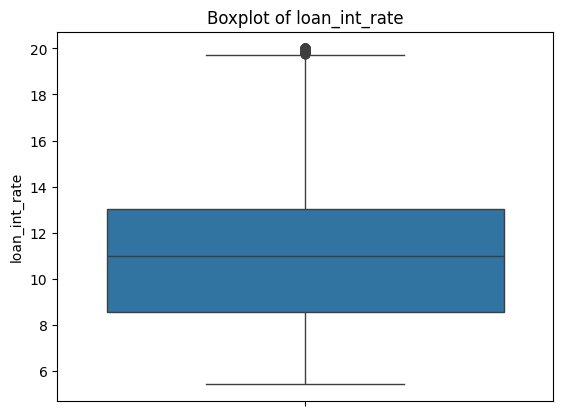

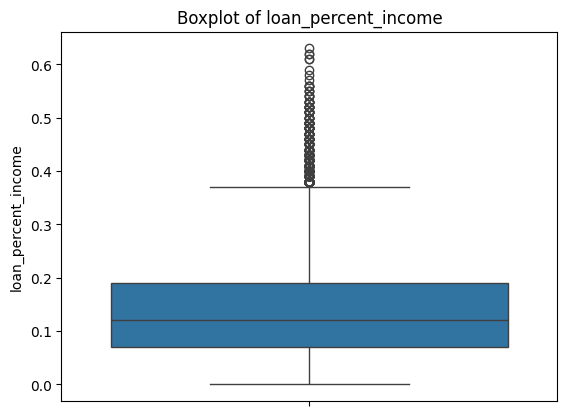

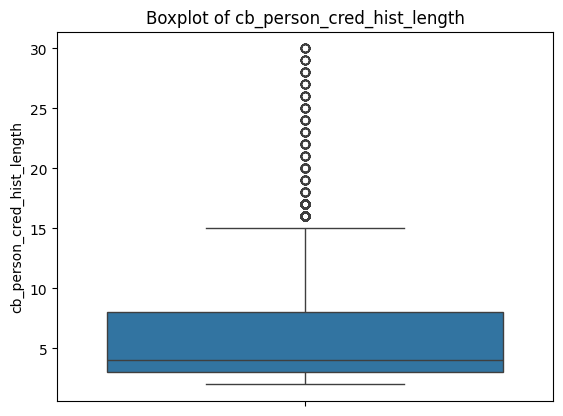

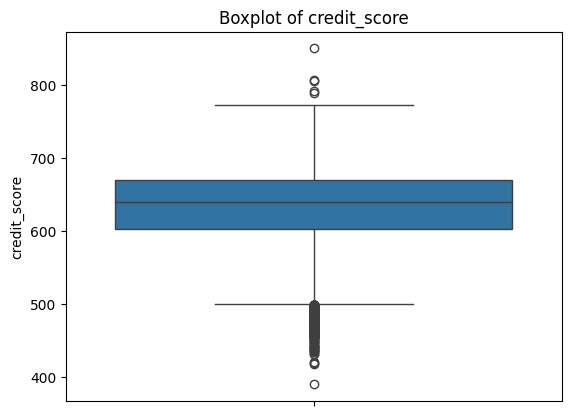

In [48]:
#check outlie
for col in num_cols:
  sns.boxplot(X_train[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [49]:
features = num_cols.copy()

for feature in features:
    Q1 = X_train[feature].quantile(0.25)
    Q3 = X_train[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap pada training data
    X_train[feature] = np.where(X_train[feature] < lower_bound, lower_bound, X_train[feature])
    X_train[feature] = np.where(X_train[feature] > upper_bound, upper_bound, X_train[feature])

    # Cap pada validation/test data (gunakan Q1, Q3 dari training)
    X_val[feature] = np.where(X_val[feature] < lower_bound, lower_bound, X_val[feature])
    X_val[feature] = np.where(X_val[feature] > upper_bound, upper_bound, X_val[feature])


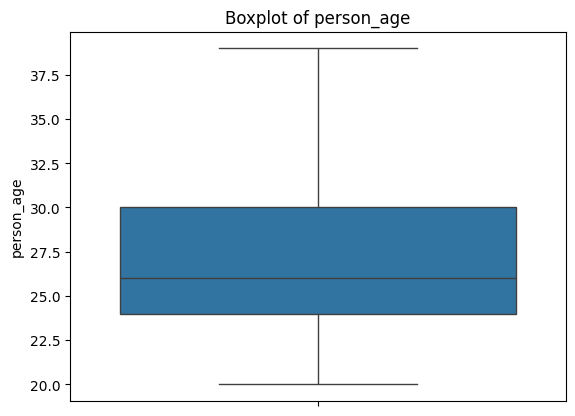

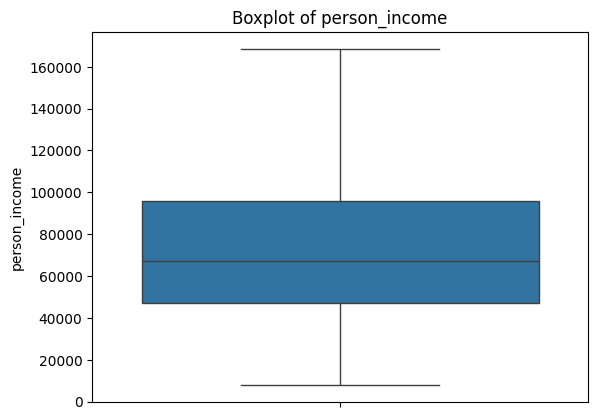

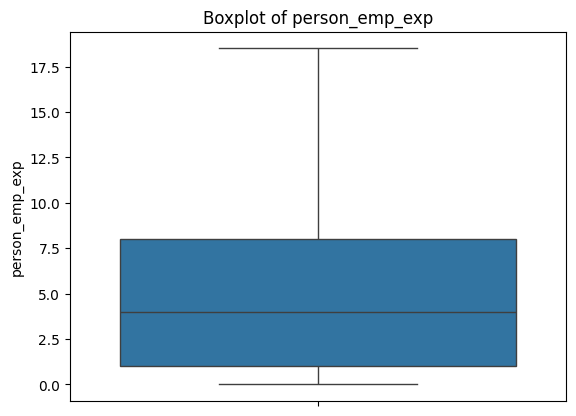

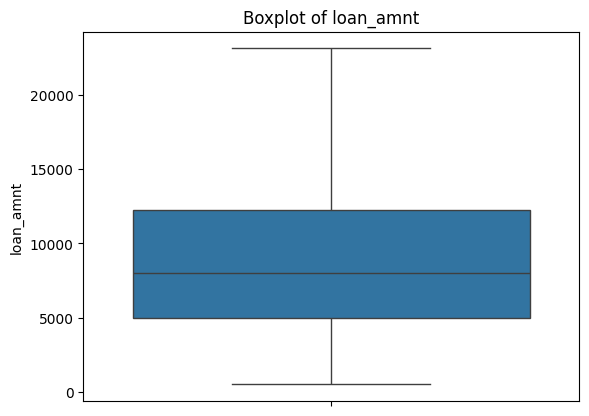

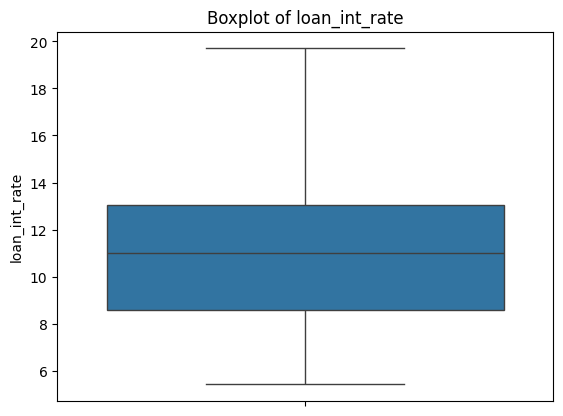

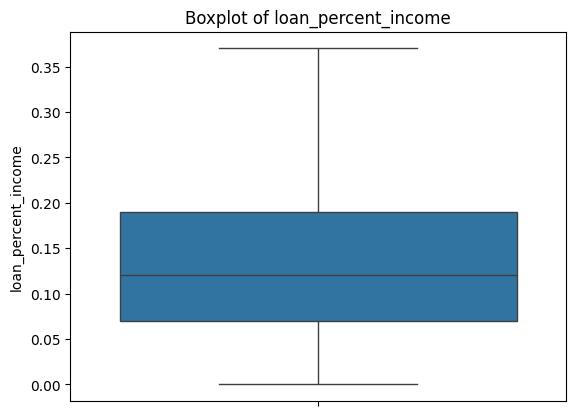

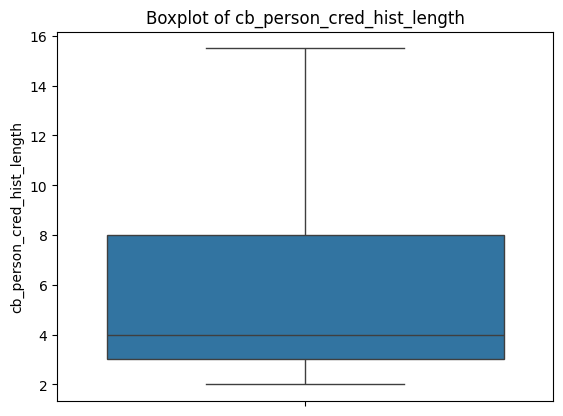

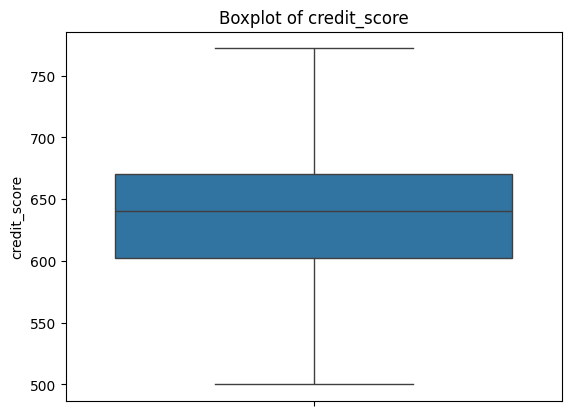

In [50]:
#check outlie
for col in num_cols:
  sns.boxplot(X_train[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

### Encoding

In [68]:
# This will replace the columns with the one-hot encoded ones and keep the columns outside 'columns' argument as it is.
X_train_encoded = pd.get_dummies(data=X_train, prefix=cat_cols, columns=cat_cols)
X_val_encoded = pd.get_dummies(data=X_val, prefix=cat_cols, columns=cat_cols)

#replace from bool to numerik
X_train_encoded = X_train_encoded.replace({True: 1, False:0})
X_val_encoded = X_val_encoded.replace({True: 1, False:0})

print(X_val_encoded)

       person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
37979        32.0        96865.0            10.0     7500.0           6.04   
9911         24.0        56838.0             6.0     9000.0          11.49   
43386        22.0        37298.0             0.0     5000.0          14.88   
13822        23.0        39944.0             1.0     5000.0          13.99   
44810        39.0        67974.0            18.5    10000.0          15.41   
...           ...            ...             ...        ...            ...   
14572        21.0       133205.0             0.0    14000.0           9.99   
30384        39.0        61889.0            17.0     6725.0          16.45   
36665        24.0        78950.0             1.0    14000.0          11.65   
30569        38.0        37142.0            16.0     8000.0          11.01   
5321         25.0        35216.0             0.0     8500.0          11.14   

       loan_percent_income  cb_person_cred_hist_length  credit_

## Auto EDA

In [52]:
!pip install ydata-profiling

In [53]:
# 1. Pandas Profiling / YData Profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title ='Loan data report', explorative=True)
profile.to_file('Loan_data_repot.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:01<00:00,  8.84it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Feature Engeering


### Standarization

In [69]:
#Scalingg
columns_to_scale = X_train_encoded.select_dtypes('int64','float64').columns

scaler = MinMaxScaler()
X_train_scaled = X_train_encoded.copy()
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train_encoded[columns_to_scale])
X_val_scaled = X_val_encoded.copy()
X_val_scaled[columns_to_scale] = scaler.transform(X_val_encoded[columns_to_scale])

X_train_scald = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val_encoded.columns)

print(X_val_scaled.head())

       person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
37979        32.0        96865.0            10.0     7500.0           6.04   
9911         24.0        56838.0             6.0     9000.0          11.49   
43386        22.0        37298.0             0.0     5000.0          14.88   
13822        23.0        39944.0             1.0     5000.0          13.99   
44810        39.0        67974.0            18.5    10000.0          15.41   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
37979                 0.08                        10.0         601.0   
9911                  0.16                         4.0         647.0   
43386                 0.13                         4.0         711.0   
13822                 0.13                         3.0         597.0   
44810                 0.15                        11.0         586.0   

       person_gender_female  person_gender_male  ...  \
37979                   0.0               

In [ ]:
import joblib
#save standart scaler
joblib.dump(scaler, 'scaler.pkl')

### Chek multikoleanization

In [59]:
X = X_train_scaled.select_dtypes(include='number')

# Adding a constant column for intercept
X['intercept'] = 1

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF, excluding the intercept
vif_data = vif_data[vif_data['Feature'] != 'intecept']
vif_data

,Feature,VIF
0,person_age,10.851510
1,person_income,4.422953
2,person_emp_exp,8.183822
3,loan_amnt,6.011359
4,loan_int_rate,1.078977
5,loan_percent_income,5.769939
6,cb_person_cred_hist_length,4.277868
7,credit_score,1.122869
8,person_gender_female,inf
9,person_gender_male,inf


## Modeling

In [ ]:
# !pip install pycaret

In [ ]:
# from pycaret.classification import *

# train_data = pd.concat([X_train_scaled, y_train], axis=1)

# # Setup PyCaret
# clf_setup = setup(data=train_data,
#                   target='loan_status',
#                   session_id=123,
#                   verbose=False)


In [ ]:
# best_model = compare_models()

In [ ]:
# test_data = pd.concat([X_val_scaled, y_val], axis=1)

# # Evaluation
# predictions = predict_model(best_model, data=test_data)
# print(predictions.head())

In [60]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    random_state=42,
    verbose=0
)

lgb_model.fit(X_train_scaled, y_train,
              eval_set=[(X_val_scaled, y_val)],
              eval_metric='binary_logloss')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


LGBMClassifier(learning_rate=0.05, n_estimators=200, random_state=42, verbose=0)

## Evaluation

In [61]:
#train best model
lgb_model.fit(X_train_scaled, y_train)
#prediction
y_pred_prob = lgb_model.predict_proba(X_val_scaled)[:, 1]
y_pred = lgb_model.predict(X_val_scaled)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


In [62]:
print('Classification Report: \n')
print(classification_report(y_val,y_pred))

Classification Report: 

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.79      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000



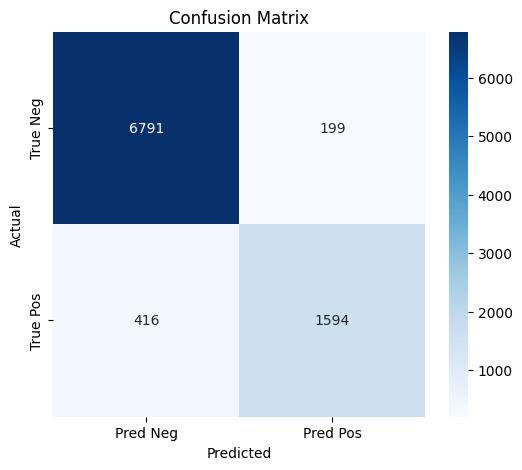

In [63]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred Neg', 'Pred Pos'], yticklabels=['True Neg', 'True Pos'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Save Best Model dan pipeline untuk fast api


In [64]:
print(X_train.columns.tolist())


['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file']


In [71]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
import joblib

# 1. Tentukan kolom numerik dan kategorikal
numeric_cols = [
    "person_age",
    "person_income",
    "person_emp_exp",
    "loan_amnt",
    "loan_int_rate",
    "loan_percent_income",
    "cb_person_cred_hist_length",
    "credit_score",
]

categorical_cols = [
    "person_education",
    "person_home_ownership",
    "loan_intent",
    "previous_loan_defaults_on_file",
    "person_gender"
]


# 3. Buat preprocessor pipeline
preprocessor = ColumnTransformer([
    ("num", MinMaxScaler(), numeric_cols),
    ("cat", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), categorical_cols)
])


# 4. Gabungkan preprocessor dan model ke pipeline
pipeline = Pipeline([
    ("pre", preprocessor),
    ("clf", LGBMClassifier(
        n_estimators=200,
        learning_rate=0.05,
        num_leaves=31,
        max_depth=-1,
        random_state=42,
        verbose=0
    ))
])

# 5. Fit model dengan data mentah
pipeline.fit(X_train[numeric_cols + categorical_cols], y_train)

# 6. Simpan pipeline
joblib.dump(pipeline, "pipeline.pkl")
print('piline berhasil disimpan')

y_pred_prob = pipeline.predict_proba(X_val)[:, 1]
y_pred = pipeline.predict(X_val)

print('Classification Report: \n')
print(classification_report(y_val,y_pred))

piline berhasil disimpan
Classification Report: 

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.79      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000

